In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime

In [42]:
# def convolve2d(X, W):
#     t0 = datetime.now()
#     n1, n2 = X.shape
#     m1, m2 = W.shape
#     o1, o2 = n1 + m1 - 1, n2 + m2 - 1
#     print("n1:",n1,"n2:",n2,"m1:",m1,"m2:",m2,"o1",o1,"o2",o2)
#     Y = np.zeros((o1, o2))
#     for i in range(o1):
#         for ii in range(m1):
#             for j in range(o2):
#                 for jj in range(m2):
#                     if i >= ii and j >= jj and i - ii < n1 and j - jj < n2:
#                         Y[i,j] += W[ii,jj]*X[i - ii, j - jj]
        
#     print('elapsed time:', (datetime.now() - t0))
#     return Y

def convolve2d(X, W):
    t0 = datetime.now()
    n1, n2 = X.shape
    m1, m2 = W.shape
    Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
    for i in range(n1):
        for j in range(n2):
            Y[i:i+m1,j:j+m2] += X[i,j]*W
        if i % 10 == 0:
            plt.imshow(Y)
            plt.show()
    print ("elapsed time:", (datetime.now() - t0))
    return Y

# same size as input
# def convolve2d(X, W):
#     n1, n2 = X.shape
#     m1, m2 = W.shape
#     Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
#     for i in range(n1):
#         for j in range(n2):
#             Y[i:i+m1,j:j+m2] += X[i,j]*W
#     ret = Y[m1//2:-m1//2+1,m2//2:-m2//2+1]
#     assert(ret.shape == X.shape)
#     return ret

# smaller than input
# def convolve2d(X, W):
#     n1, n2 = X.shape
#     m1, m2 = W.shape
#     Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
#     for i in xrange(n1):
#         for j in xrange(n2):
#             Y[i:i+m1,j:j+m2] += X[i,j]*W
#     ret = Y[m1-1:-m1+1,m2-1:-m2+1]
#     return ret

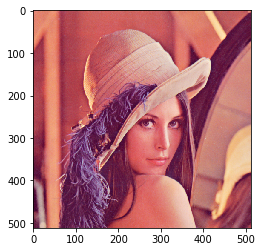

In [3]:
# load the famous Lena image
img = mpimg.imread('lena.png')

# what does it look like?
plt.imshow(img)
plt.show()

(128, 128)


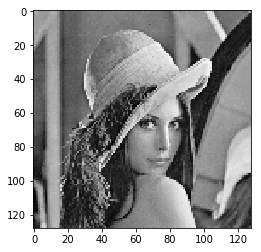

In [54]:
# make it B&W
bw = img.mean(axis=2)
bw = bw[::4, ::4] #downsampling to see the convolution
print(bw.shape)
plt.imshow(bw, cmap='gray')
plt.show()

(20, 20)


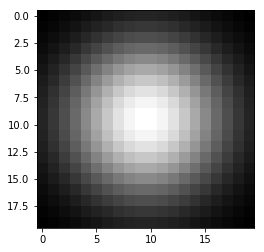

In [55]:
# create a Gaussian filter
W = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        dist = (i - 9.5)**2 + (j - 9.5)**2
        W[i, j] = np.exp(-dist / 50.)

print(W.shape)
# let's see what the filter looks like
plt.imshow(W, cmap='gray')
plt.show()

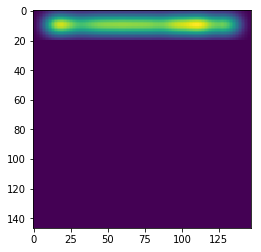

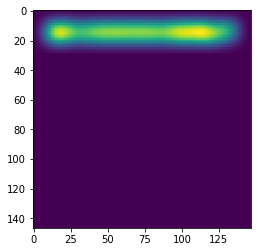

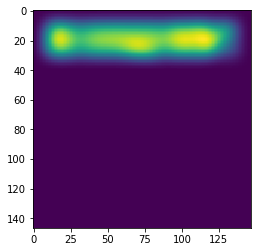

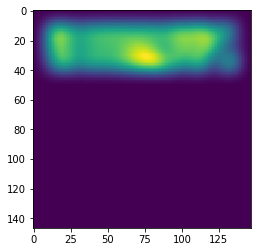

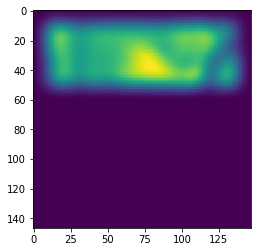

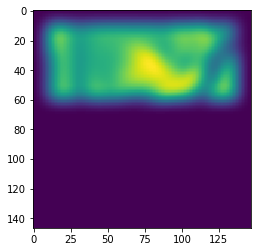

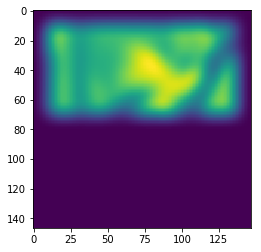

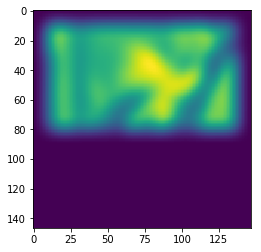

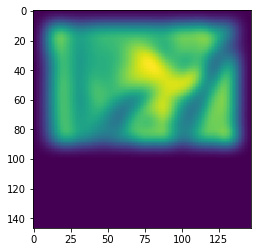

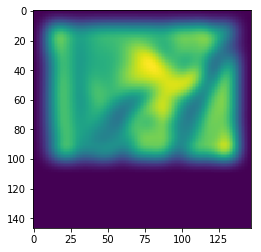

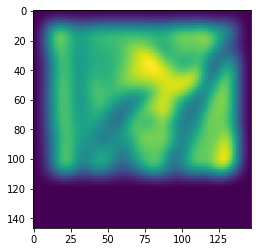

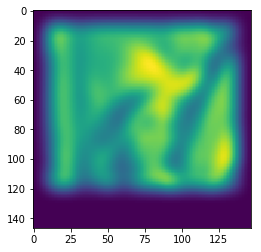

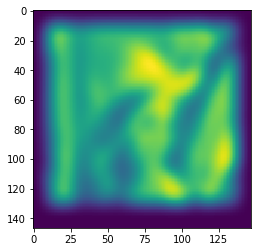

elapsed time: 0:00:01.245839


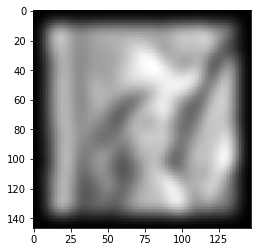

In [56]:
# now the convolution
out = convolve2d(bw, W)
plt.imshow(out, cmap='gray')
plt.show()

In [57]:
# what's that weird black stuff on the edges? let's check the size of output
print(out.shape)
# after convolution, the output signal is N1 + N2 - 1

(147, 147)


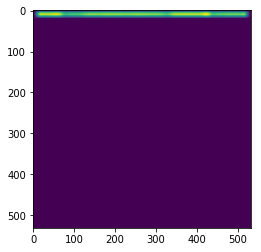

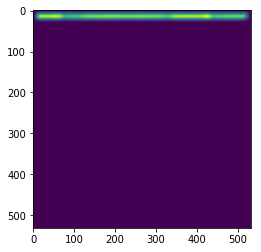

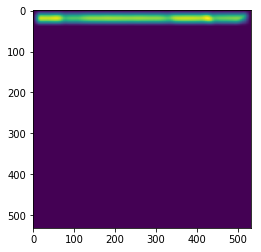

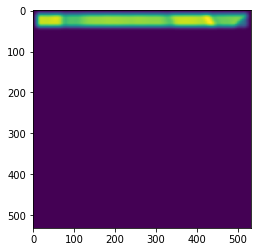

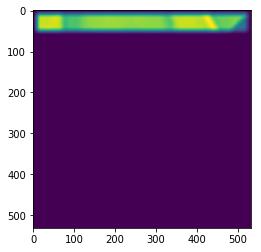

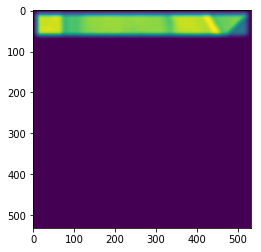

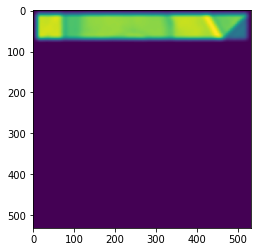

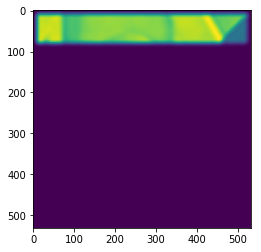

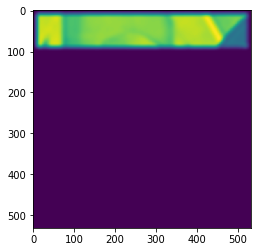

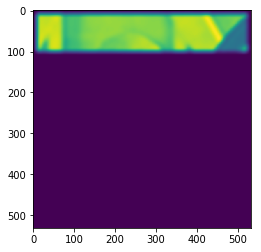

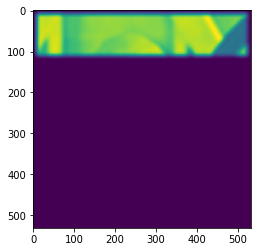

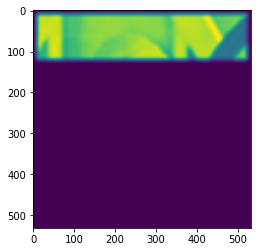

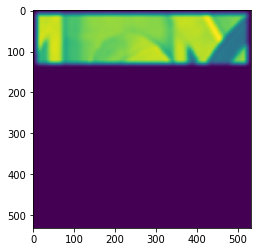

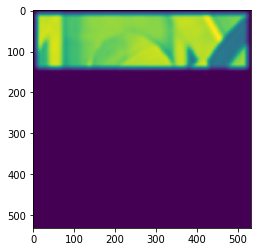

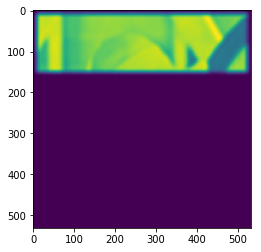

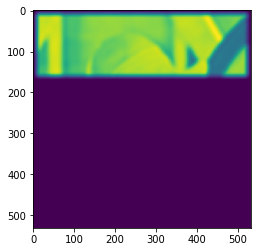

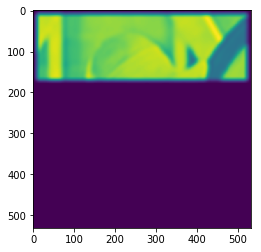

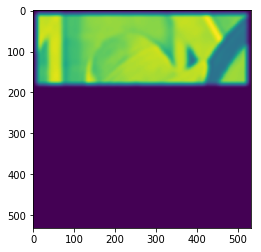

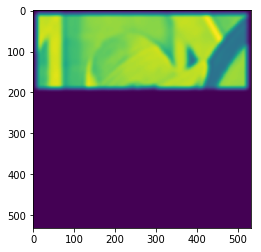

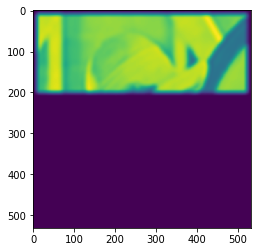

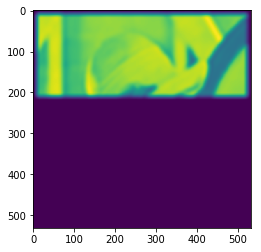

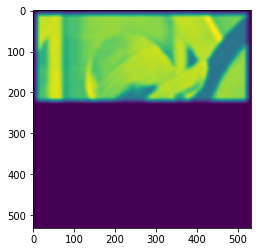

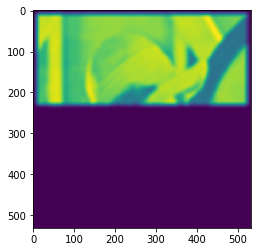

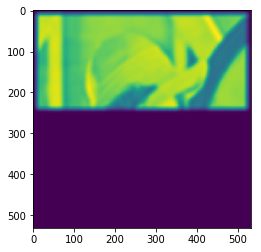

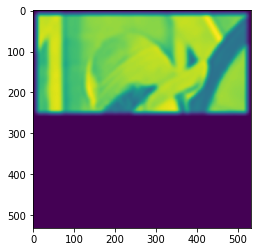

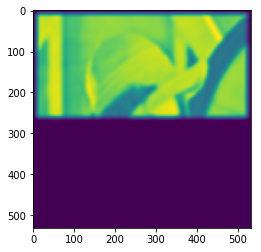

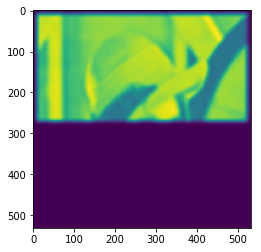

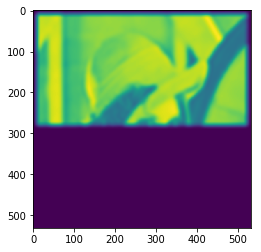

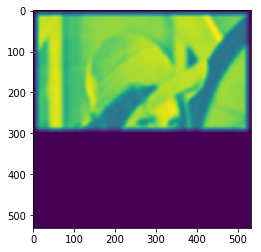

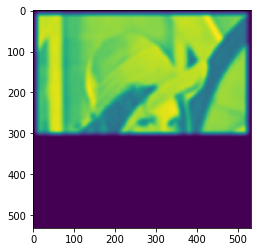

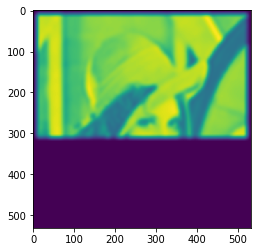

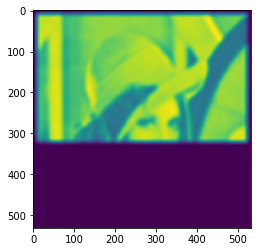

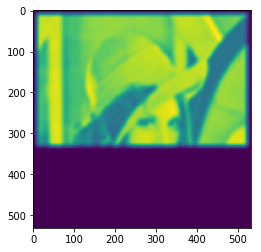

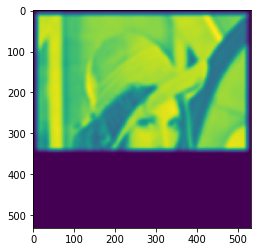

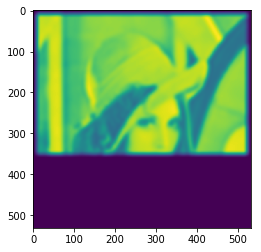

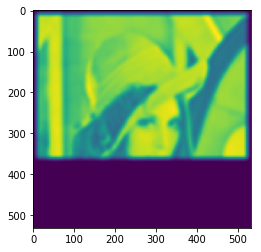

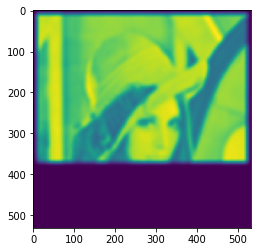

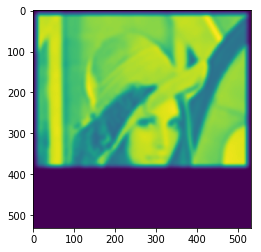

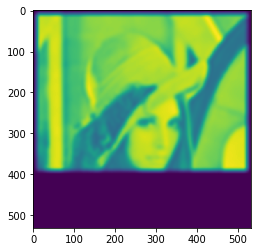

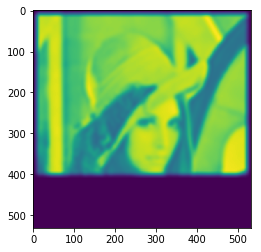

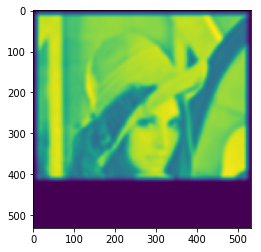

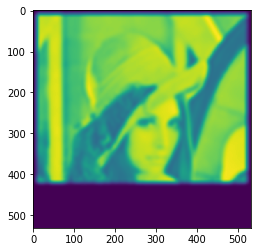

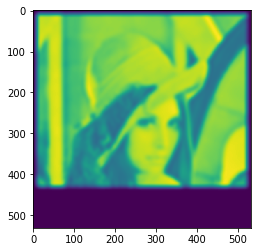

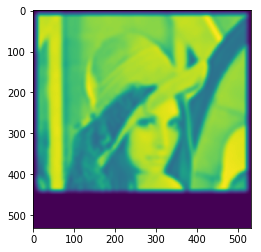

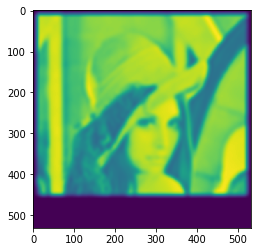

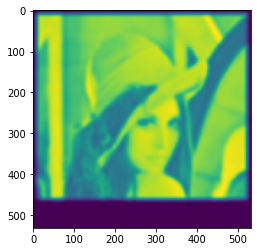

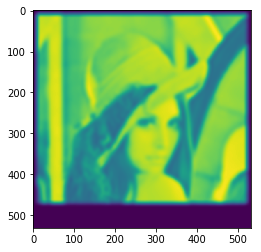

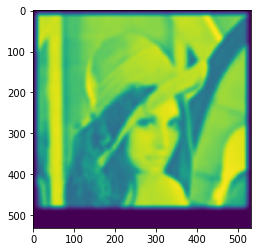

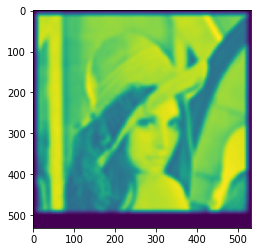

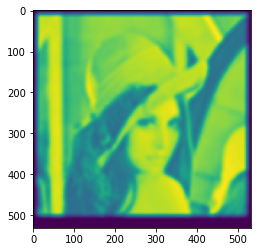

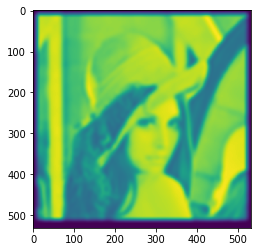

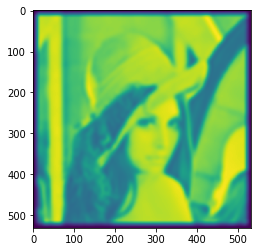

elapsed time: 0:00:06.878119


ValueError: could not broadcast input array from shape (531,531) into shape (512,512)

In [58]:
# try it in color
out = np.zeros(img.shape)
W /= W.sum()
for i in range(3):
    out[:,:,i] = convolve2d(img[:,:,i], W)
plt.imshow(out)
plt.show()